In [1]:
library(Seurat)
library(SeuratWrappers)
library(harmony)
library(SeuratDisk)
library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)

Attaching SeuratObject

Le chargement a nécessité le package : Rcpp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
custom_colors <- list()

colors_dutch <- c(
  '#FFC312','#C4E538','#12CBC4','#FDA7DF','#ED4C67',
  '#F79F1F','#A3CB38','#1289A7','#D980FA','#B53471',
  '#EE5A24','#009432','#0652DD','#9980FA','#833471',
  '#EA2027','#006266','#1B1464','#5758BB','#6F1E51'
)

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

In [3]:
options(repr.plot.width=20, repr.plot.height=20) # To set the figure size in Jupyter

In [4]:
embryo<-readRDS("/home/adufour/work/rds_storage/all_cells/embryo_allstages.rds")

In [5]:
assay <- GetAssayData(object = embryo, slot = "counts")

In [6]:
embryo <- NormalizeData(embryo) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose = FALSE)
embryo.integrated <- RunHarmony(embryo, group.by.vars = "SAMP")

Centering and scaling data matrix

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


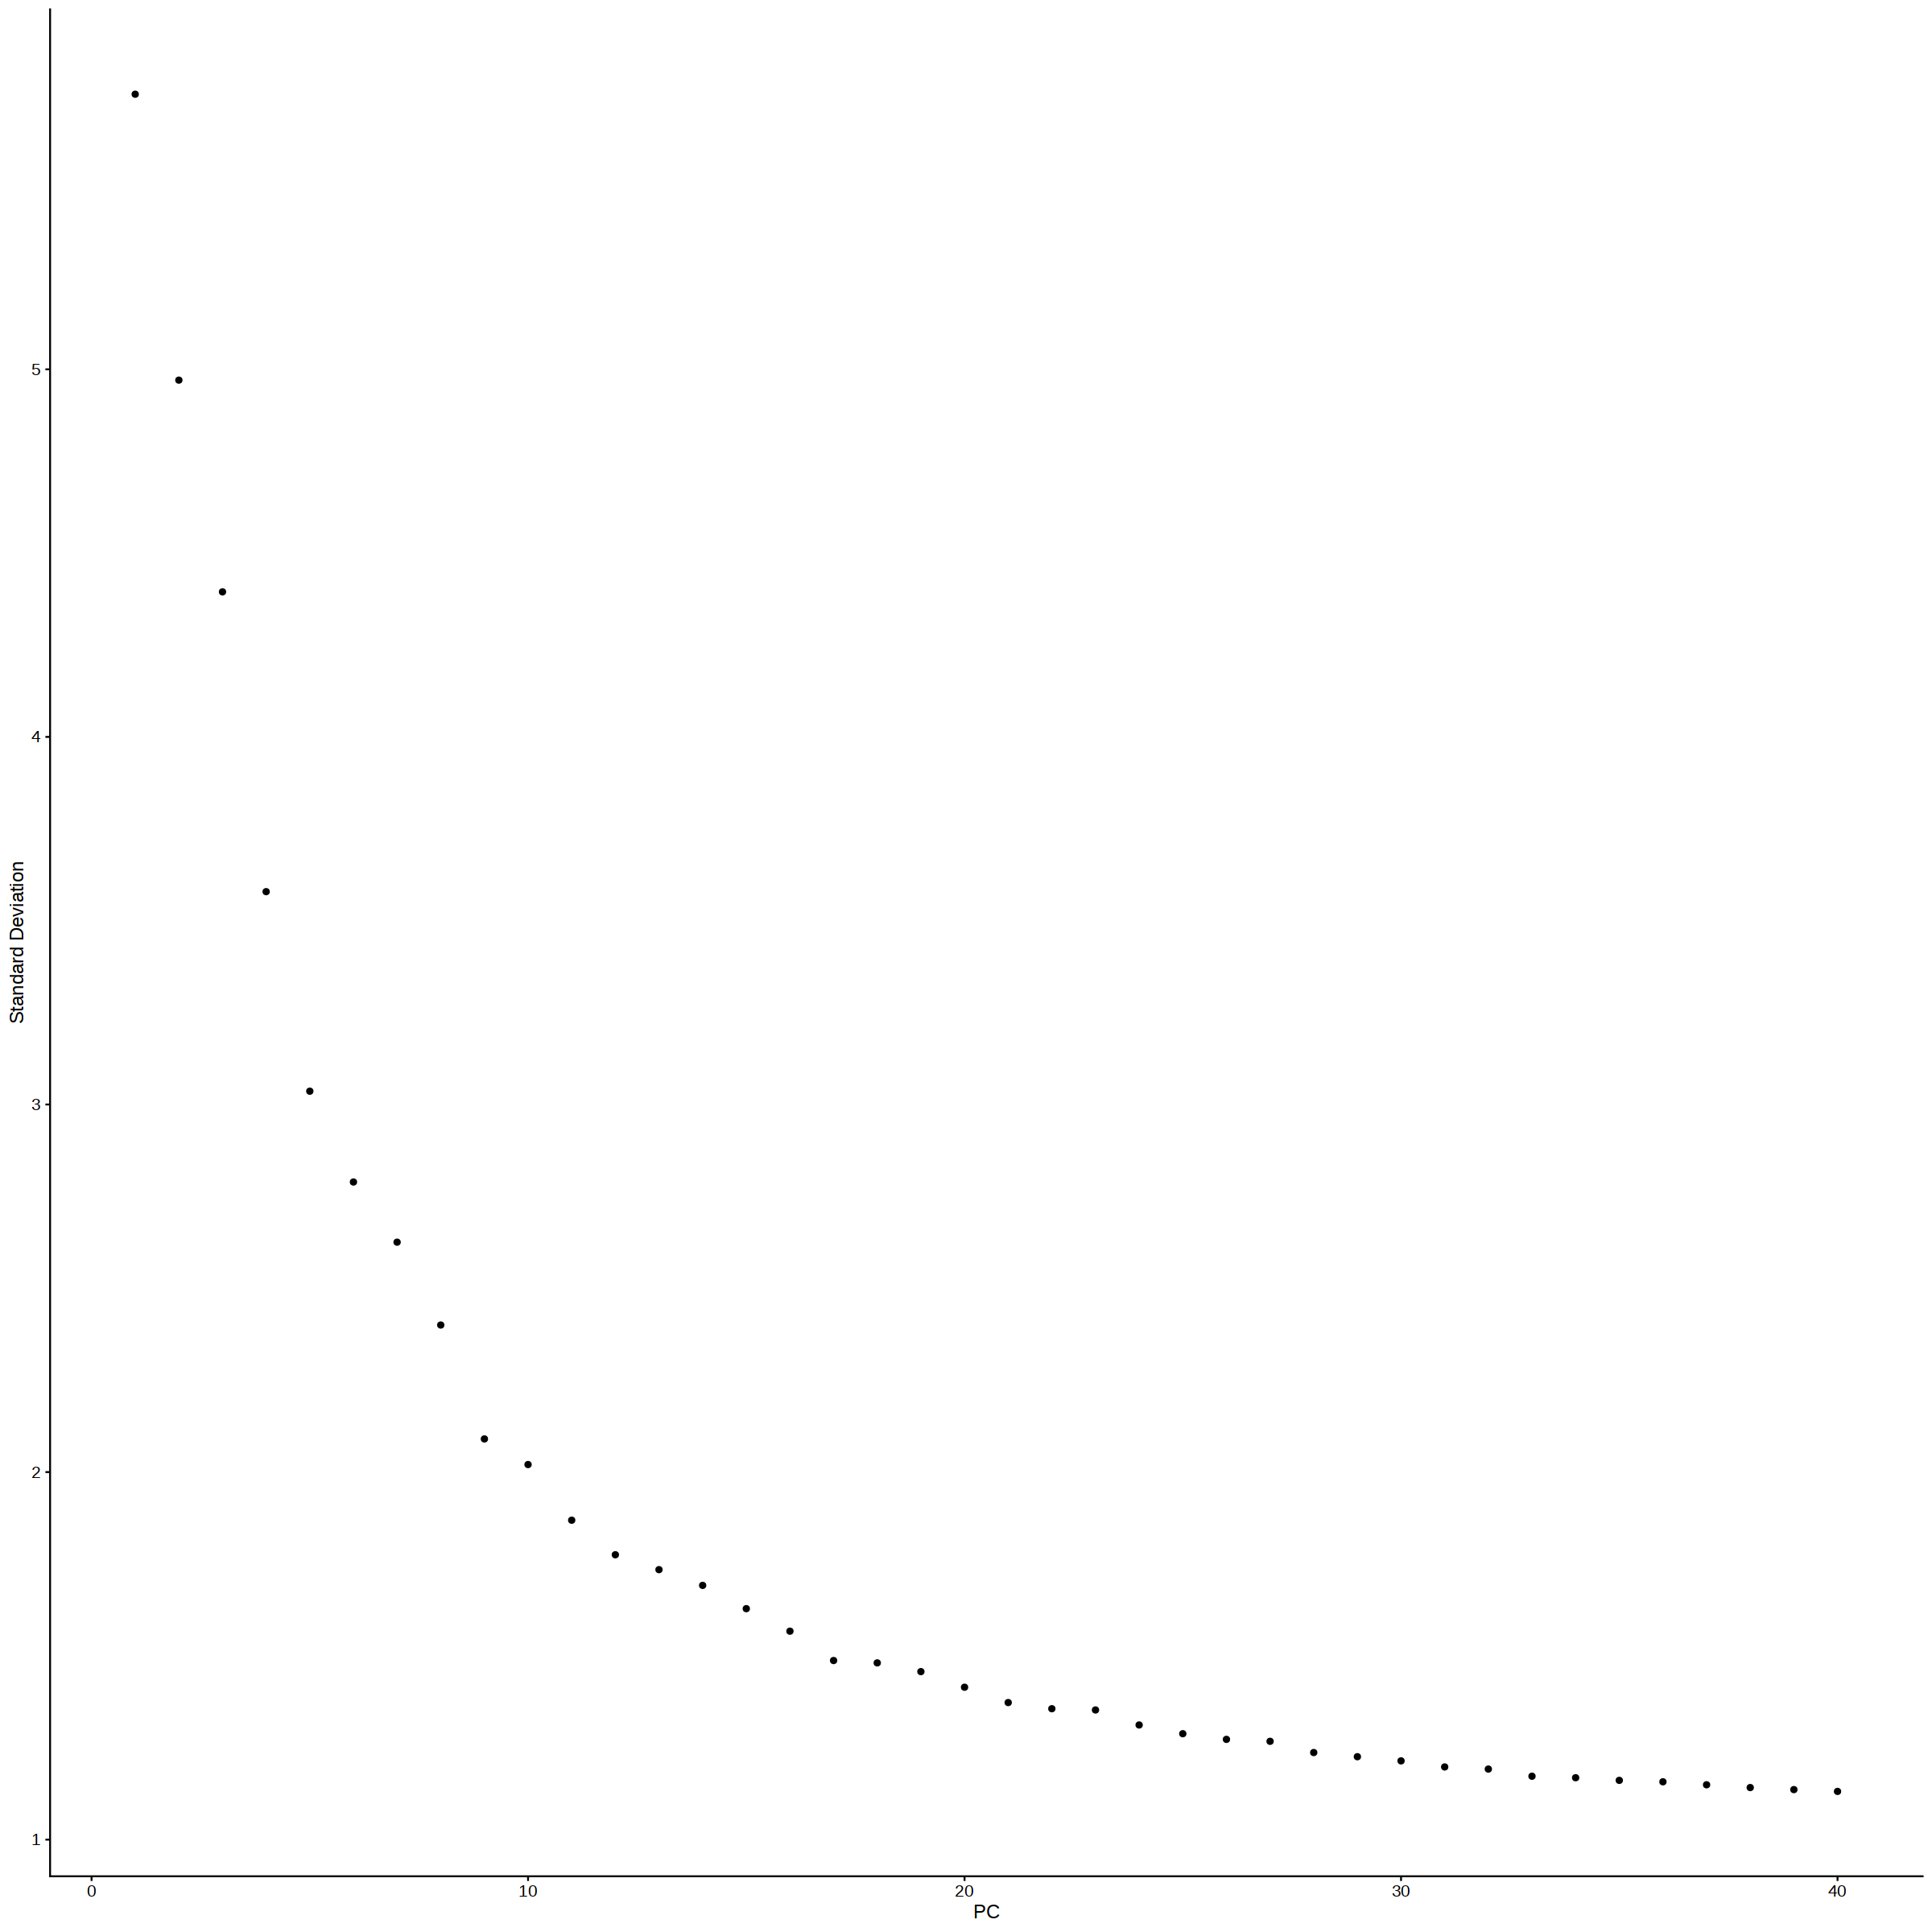

In [7]:
ElbowPlot(embryo.integrated, ndims = 40)

In [8]:
embryo.integrated <- RunUMAP(embryo.integrated, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:47:39 UMAP embedding parameters a = 0.9922 b = 1.112

09:47:39 Read 34888 rows and found 30 numeric columns

09:47:39 Using Annoy for neighbor search, n_neighbors = 30

09:47:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:47:44 Writing NN index file to temp file /tmp/RtmpD7hMZJ/file5faefbb6c49

09:47:44 Searching Annoy index using 1 thread, search_k = 3000

09:47:57 Annoy recall = 100%

09:47:58 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

In [9]:
embryo.integrated <- FindNeighbors(embryo.integrated, reduction = "harmony", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [10]:
embryo.integrated <- FindClusters(embryo.integrated, resolution = 0.05)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 34888
Number of edges: 1197707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9769
Number of communities: 7
Elapsed time: 13 seconds


1 singletons identified. 6 final clusters.



In [12]:
Idents(embryo.integrated) <- "cell_type"

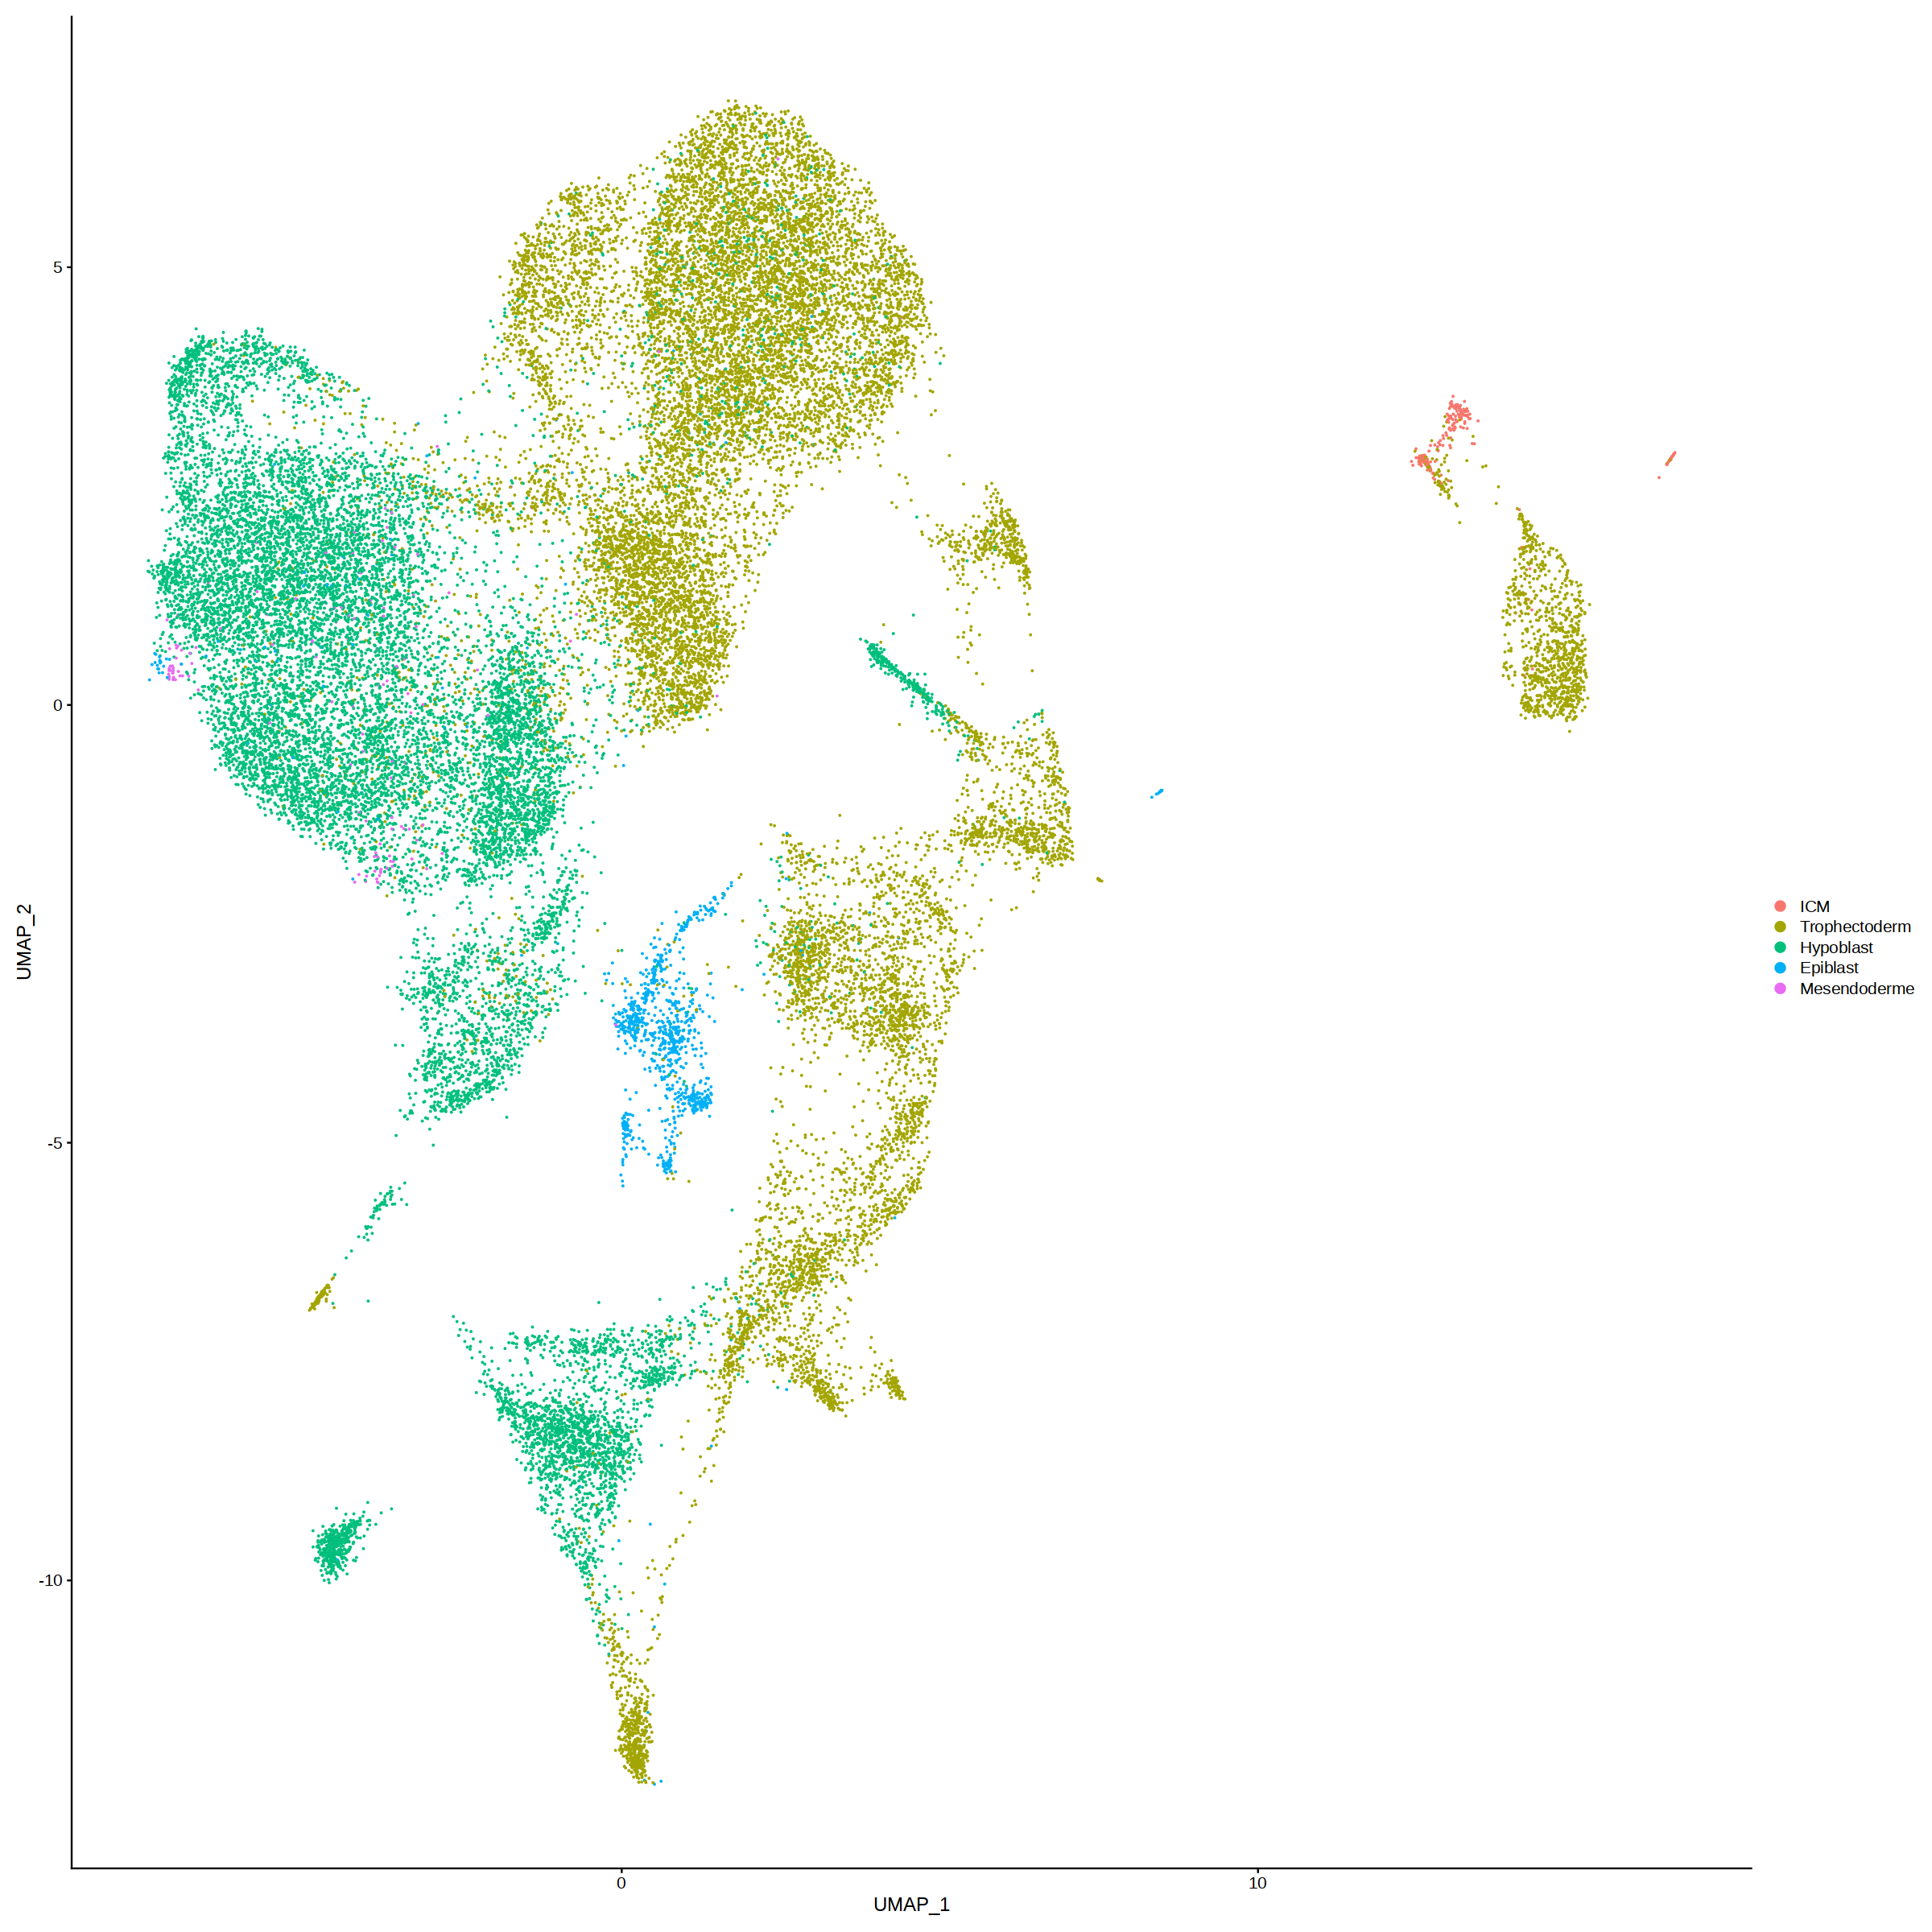

In [13]:
DimPlot(embryo.integrated, reduction = "umap")

In [14]:
embryo_te <- subset(x = embryo.integrated, subset = cell_type == "Trophectoderm")

In [15]:
embryo_te <- RunPCA(embryo_te)

PC_ 1 
Positive:  TSPO, ENSSSCG00000014565, ISG12(A), IFITM3, S100A1, ENSSSCG00000032436, FDPS, MT3, PHYH, ENSSSCG00000024911 
	   HPGD, DEFB1.1, RAB26, ENSSSCG00000032591, HIST1H2BD, PSPH, B2M, GSTM3, NMU, ENSSSCG00000032503 
	   ENSSSCG00000034740, CRYAB, ENSSSCG00000031661, ISG15, ENSSSCG00000034049, COX7A1, MT1X, C12orf57, ENSSSCG00000039158, TMSB4X 
Negative:  HTT, GBP2, ENSSSCG00000035789, PHKG1, IFN-ALPHA-8, IGF2R, LRP2, ENSSSCG00000048526, PTGS2, ENSSSCG00000003086 
	   PTPRF, CLCN7, DCAF5, BFAR, HFE, ENSSSCG00000029160, ENSSSCG00000005847, SYNPO2L, CTSD, SLC27A4 
	   ENSSSCG00000044253, TCF7, ND2, NPC1, UVRAG, TET2, AICDA, COX1, ATP8A1, ENSSSCG00000035336 
PC_ 2 
Positive:  HSD17B1, ENSSSCG00000045321, TMEM254, GM2A, ENSSSCG00000010792, ENSSSCG00000017061, CYP17A1, ALDH1L2, ENSSSCG00000016284, RDH16 
	   ENSSSCG00000013260, SLC37A2, HSD11B2, ENSSSCG00000003451, ENPP3, NPC2, CTSL, PSAP, ELOVL6, SLC16A9 
	   FOXRED2, FUCA1, EREG, CSRP2, DSC2, ENSSSCG00000033667, CANX, IL1B2, RIM

# Vizualization and clustering

In [16]:
embryo_te <- RunUMAP(embryo_te, dims = 1:25)

09:49:29 UMAP embedding parameters a = 0.9922 b = 1.112

09:49:29 Read 18239 rows and found 25 numeric columns

09:49:29 Using Annoy for neighbor search, n_neighbors = 30

09:49:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:49:31 Writing NN index file to temp file /tmp/RtmpD7hMZJ/file5faeb135f04

09:49:31 Searching Annoy index using 1 thread, search_k = 3000

09:49:37 Annoy recall = 100%

09:49:38 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

09:49:39 Initializing from normalized Laplacian + noise (using irlba)

09:49:40 Commencing optimization for 200 epochs, with 828198 positive edges

09:50:01 Optimization finished



In [17]:
embryo_te <- FindNeighbors(embryo_te, dims = 1:25)

Computing nearest neighbor graph

Computing SNN



In [18]:
embryo_te <- FindClusters(embryo_te, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 18239
Number of edges: 651245

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9344
Number of communities: 8
Elapsed time: 2 seconds


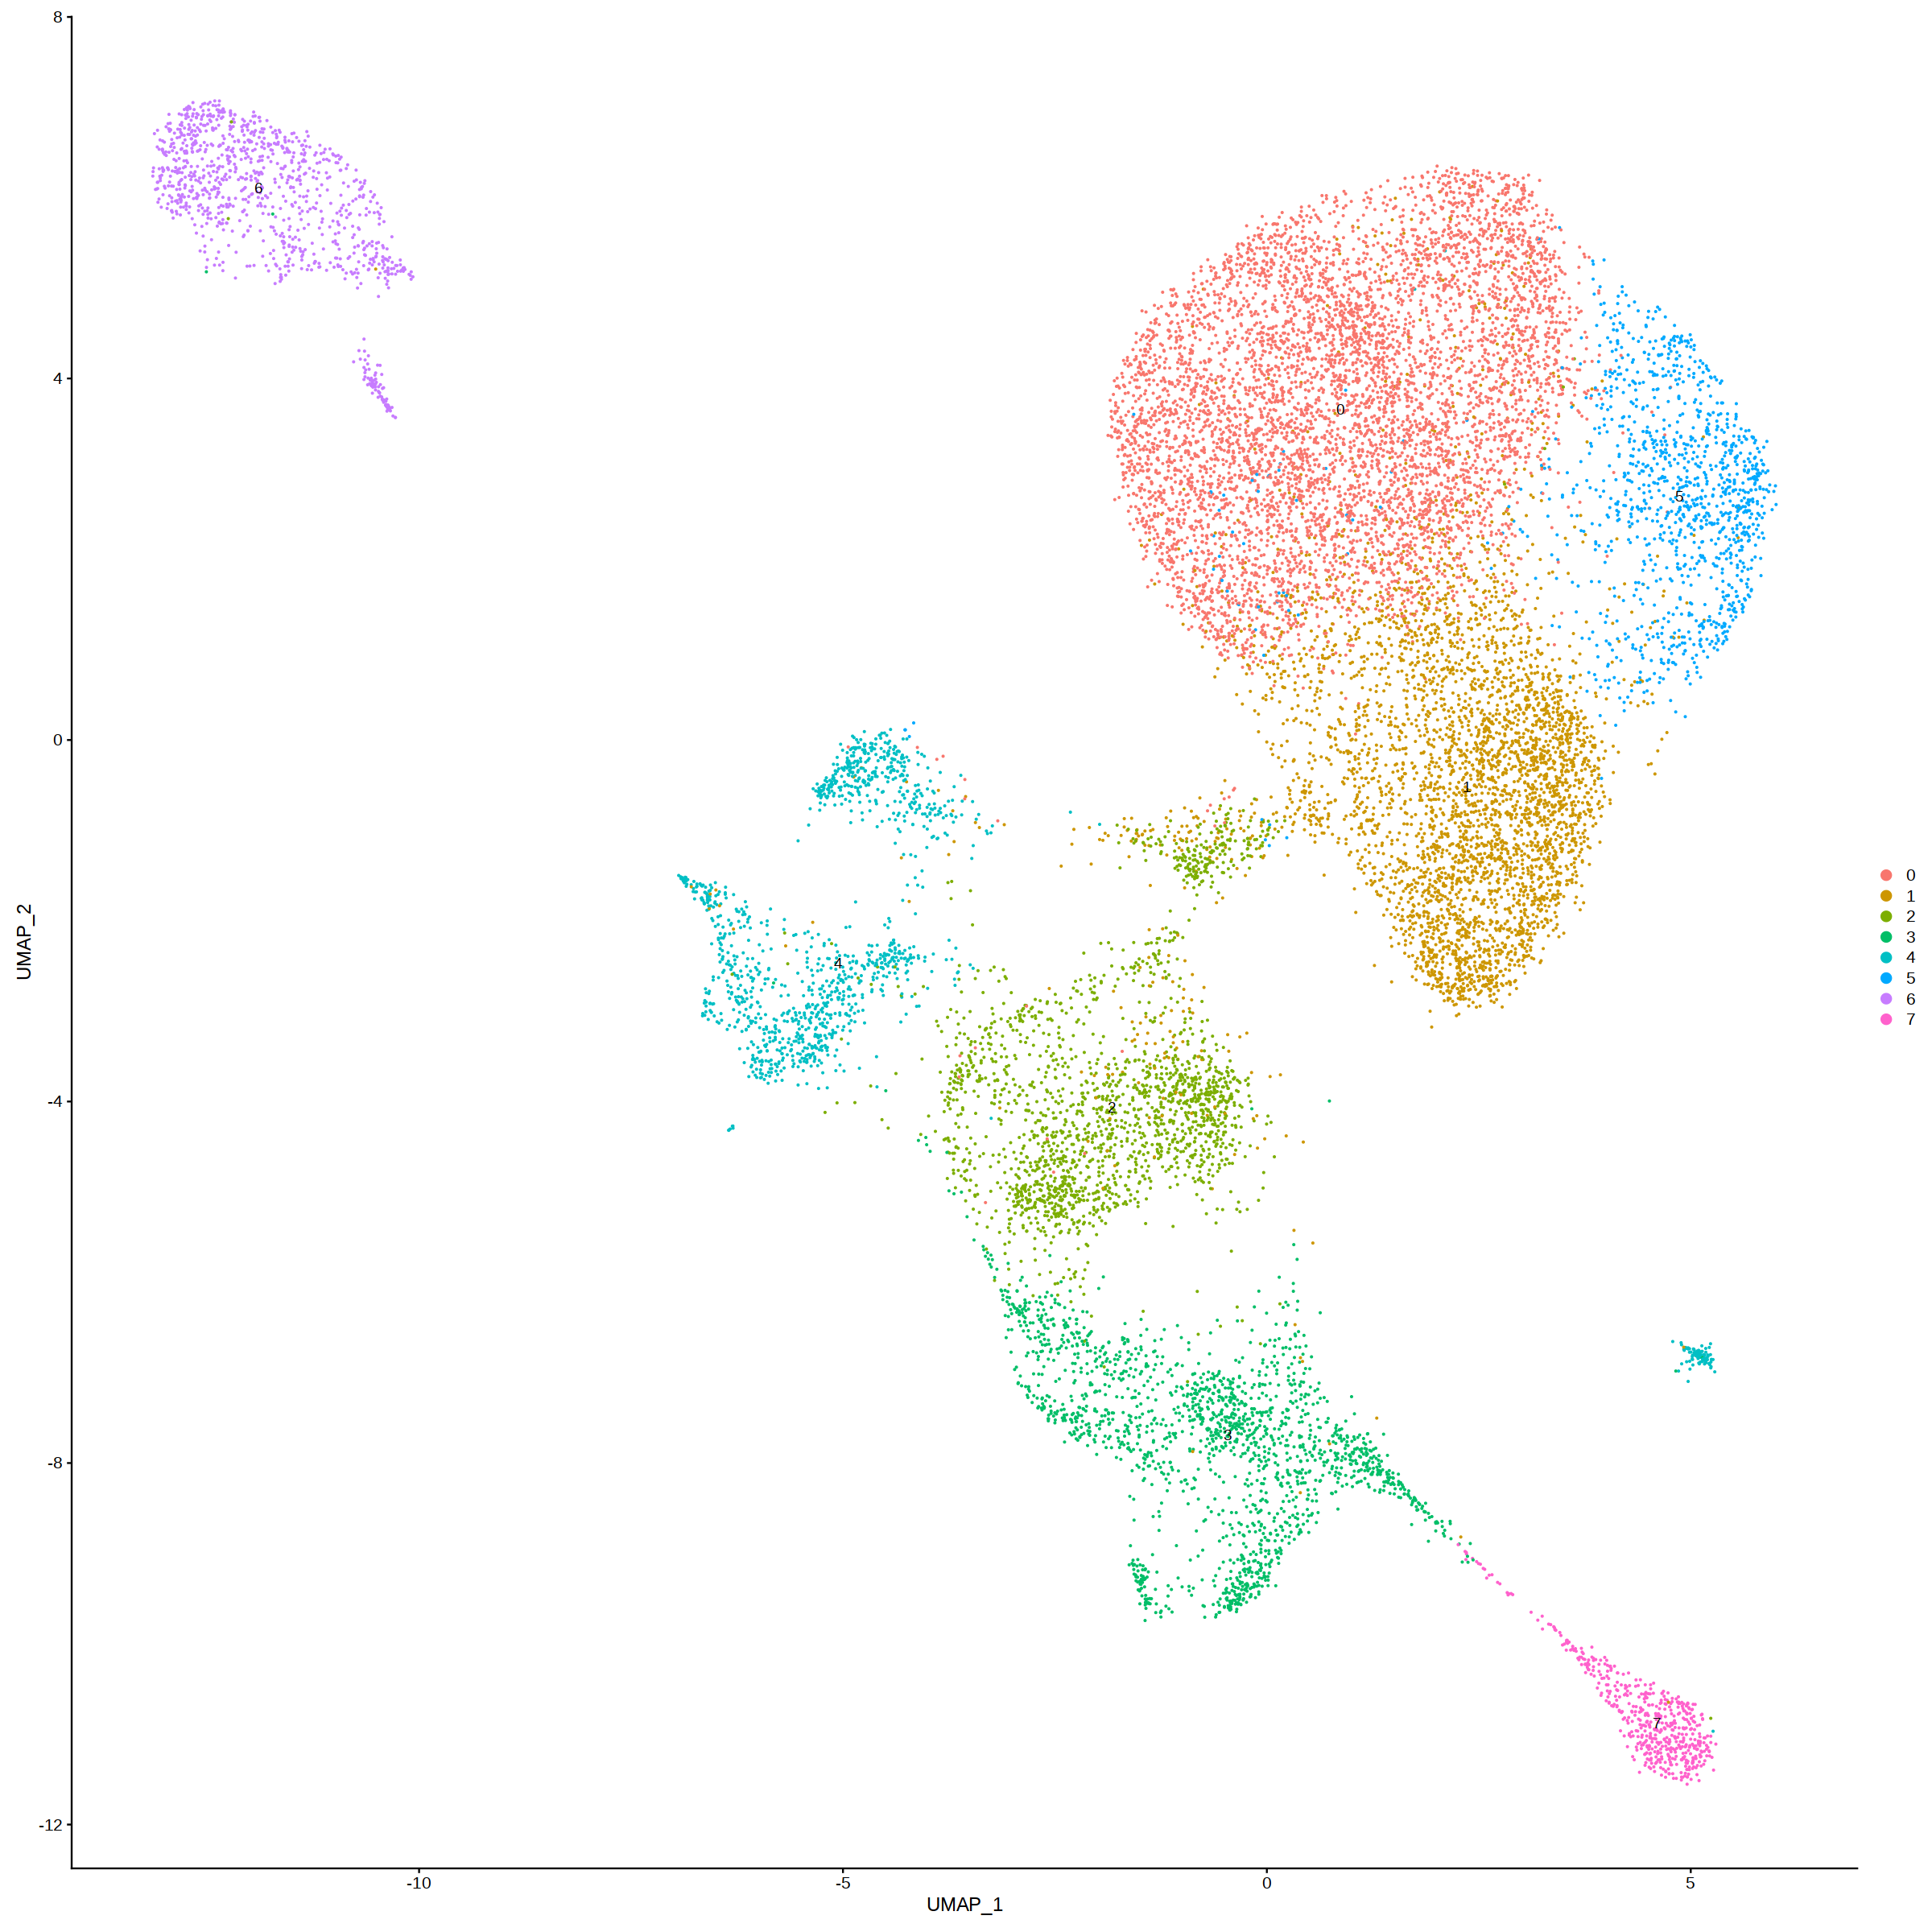

In [19]:
DimPlot(embryo_te, label = TRUE, reduction = "umap")

In [23]:
Idents(object = embryo_te) <- "Phase"

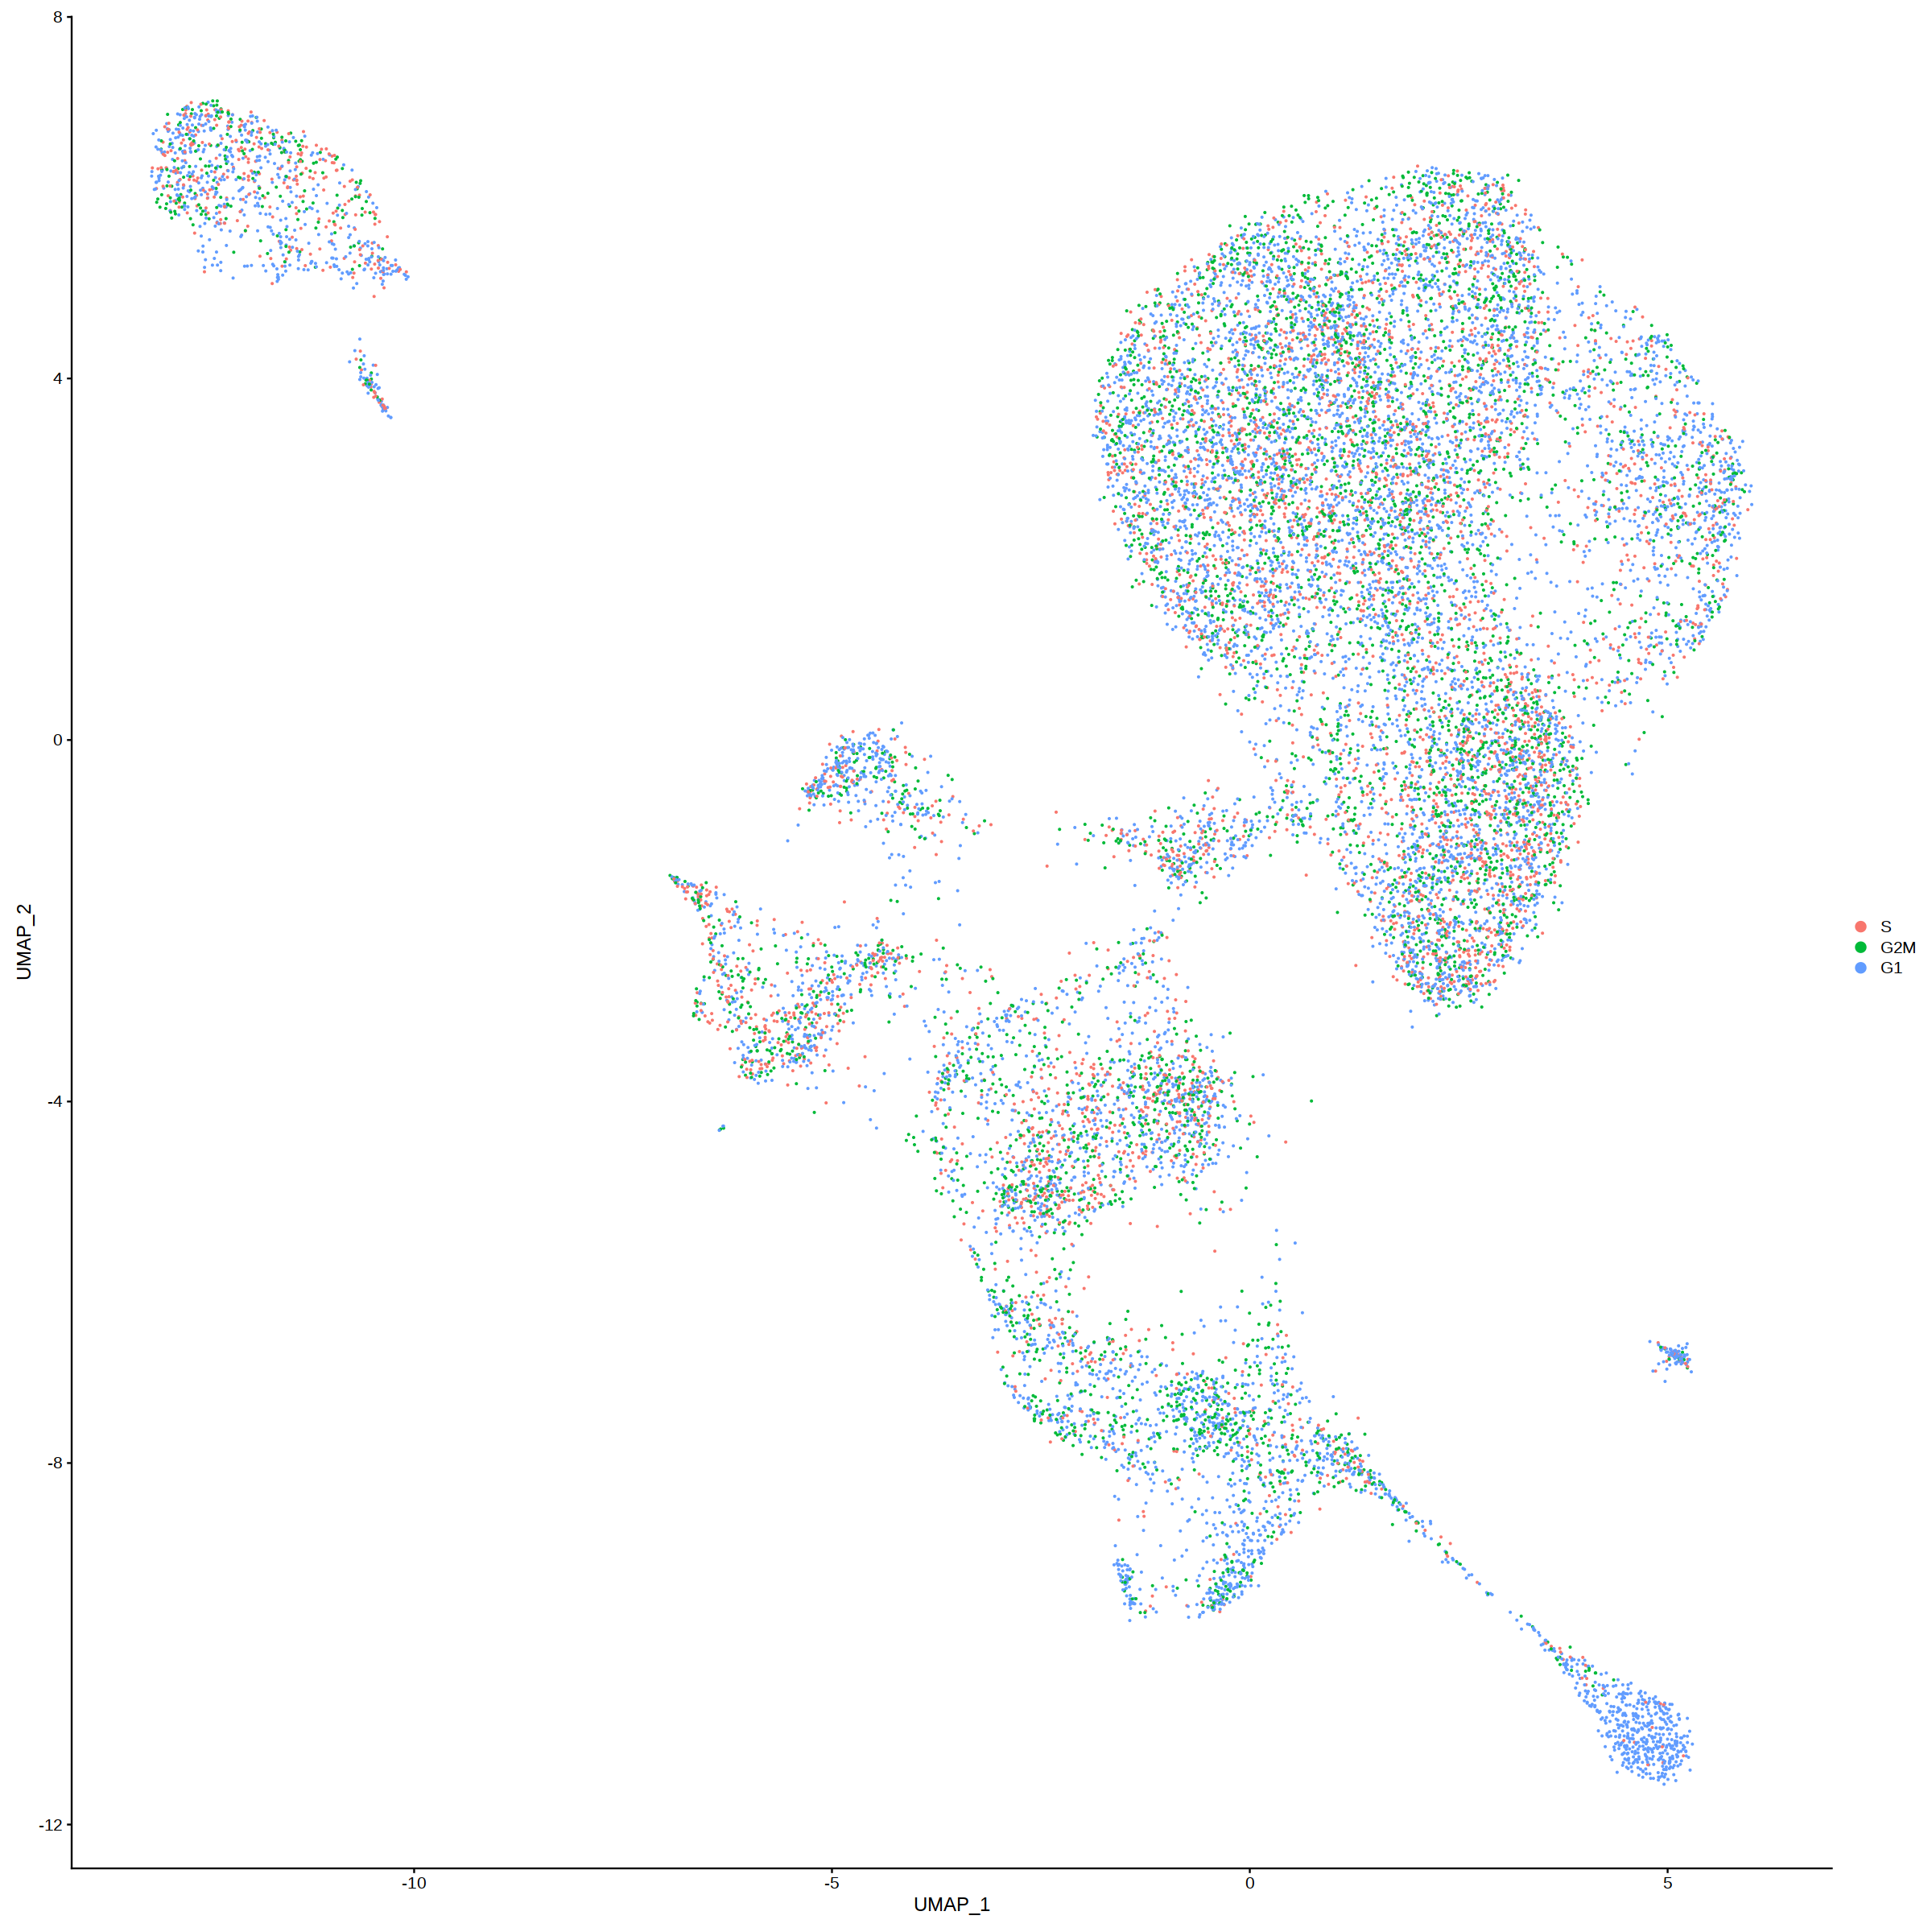

In [24]:
DimPlot(embryo_te, reduction = "umap")

In [25]:
table(embryo_te@meta.data$Phase, embryo_te@meta.data$seurat_clusters)

     
      TE Gr TE Ma TE Me TE Mu TE Lr TE Il1 TE Ea TE Mt
  G1   3032  1841   866  1009   617    676   524   493
  G2M  1716  1228   579   565   309    263   207    23
  S    1452  1127   533   212   362    280   300    25

In [22]:
Idents(object = embryo_te) <- "seurat_clusters"
new.cluster.ids <- c("TE Gr", "TE Ma", "TE Me", "TE Mu", "TE Lr", "TE Il1", "TE Ea", "TE Mt")
names(new.cluster.ids) <- levels(embryo_te)
embryo_te <- RenameIdents(embryo_te, new.cluster.ids)
embryo_te$seurat_clusters <- Idents(embryo_te)

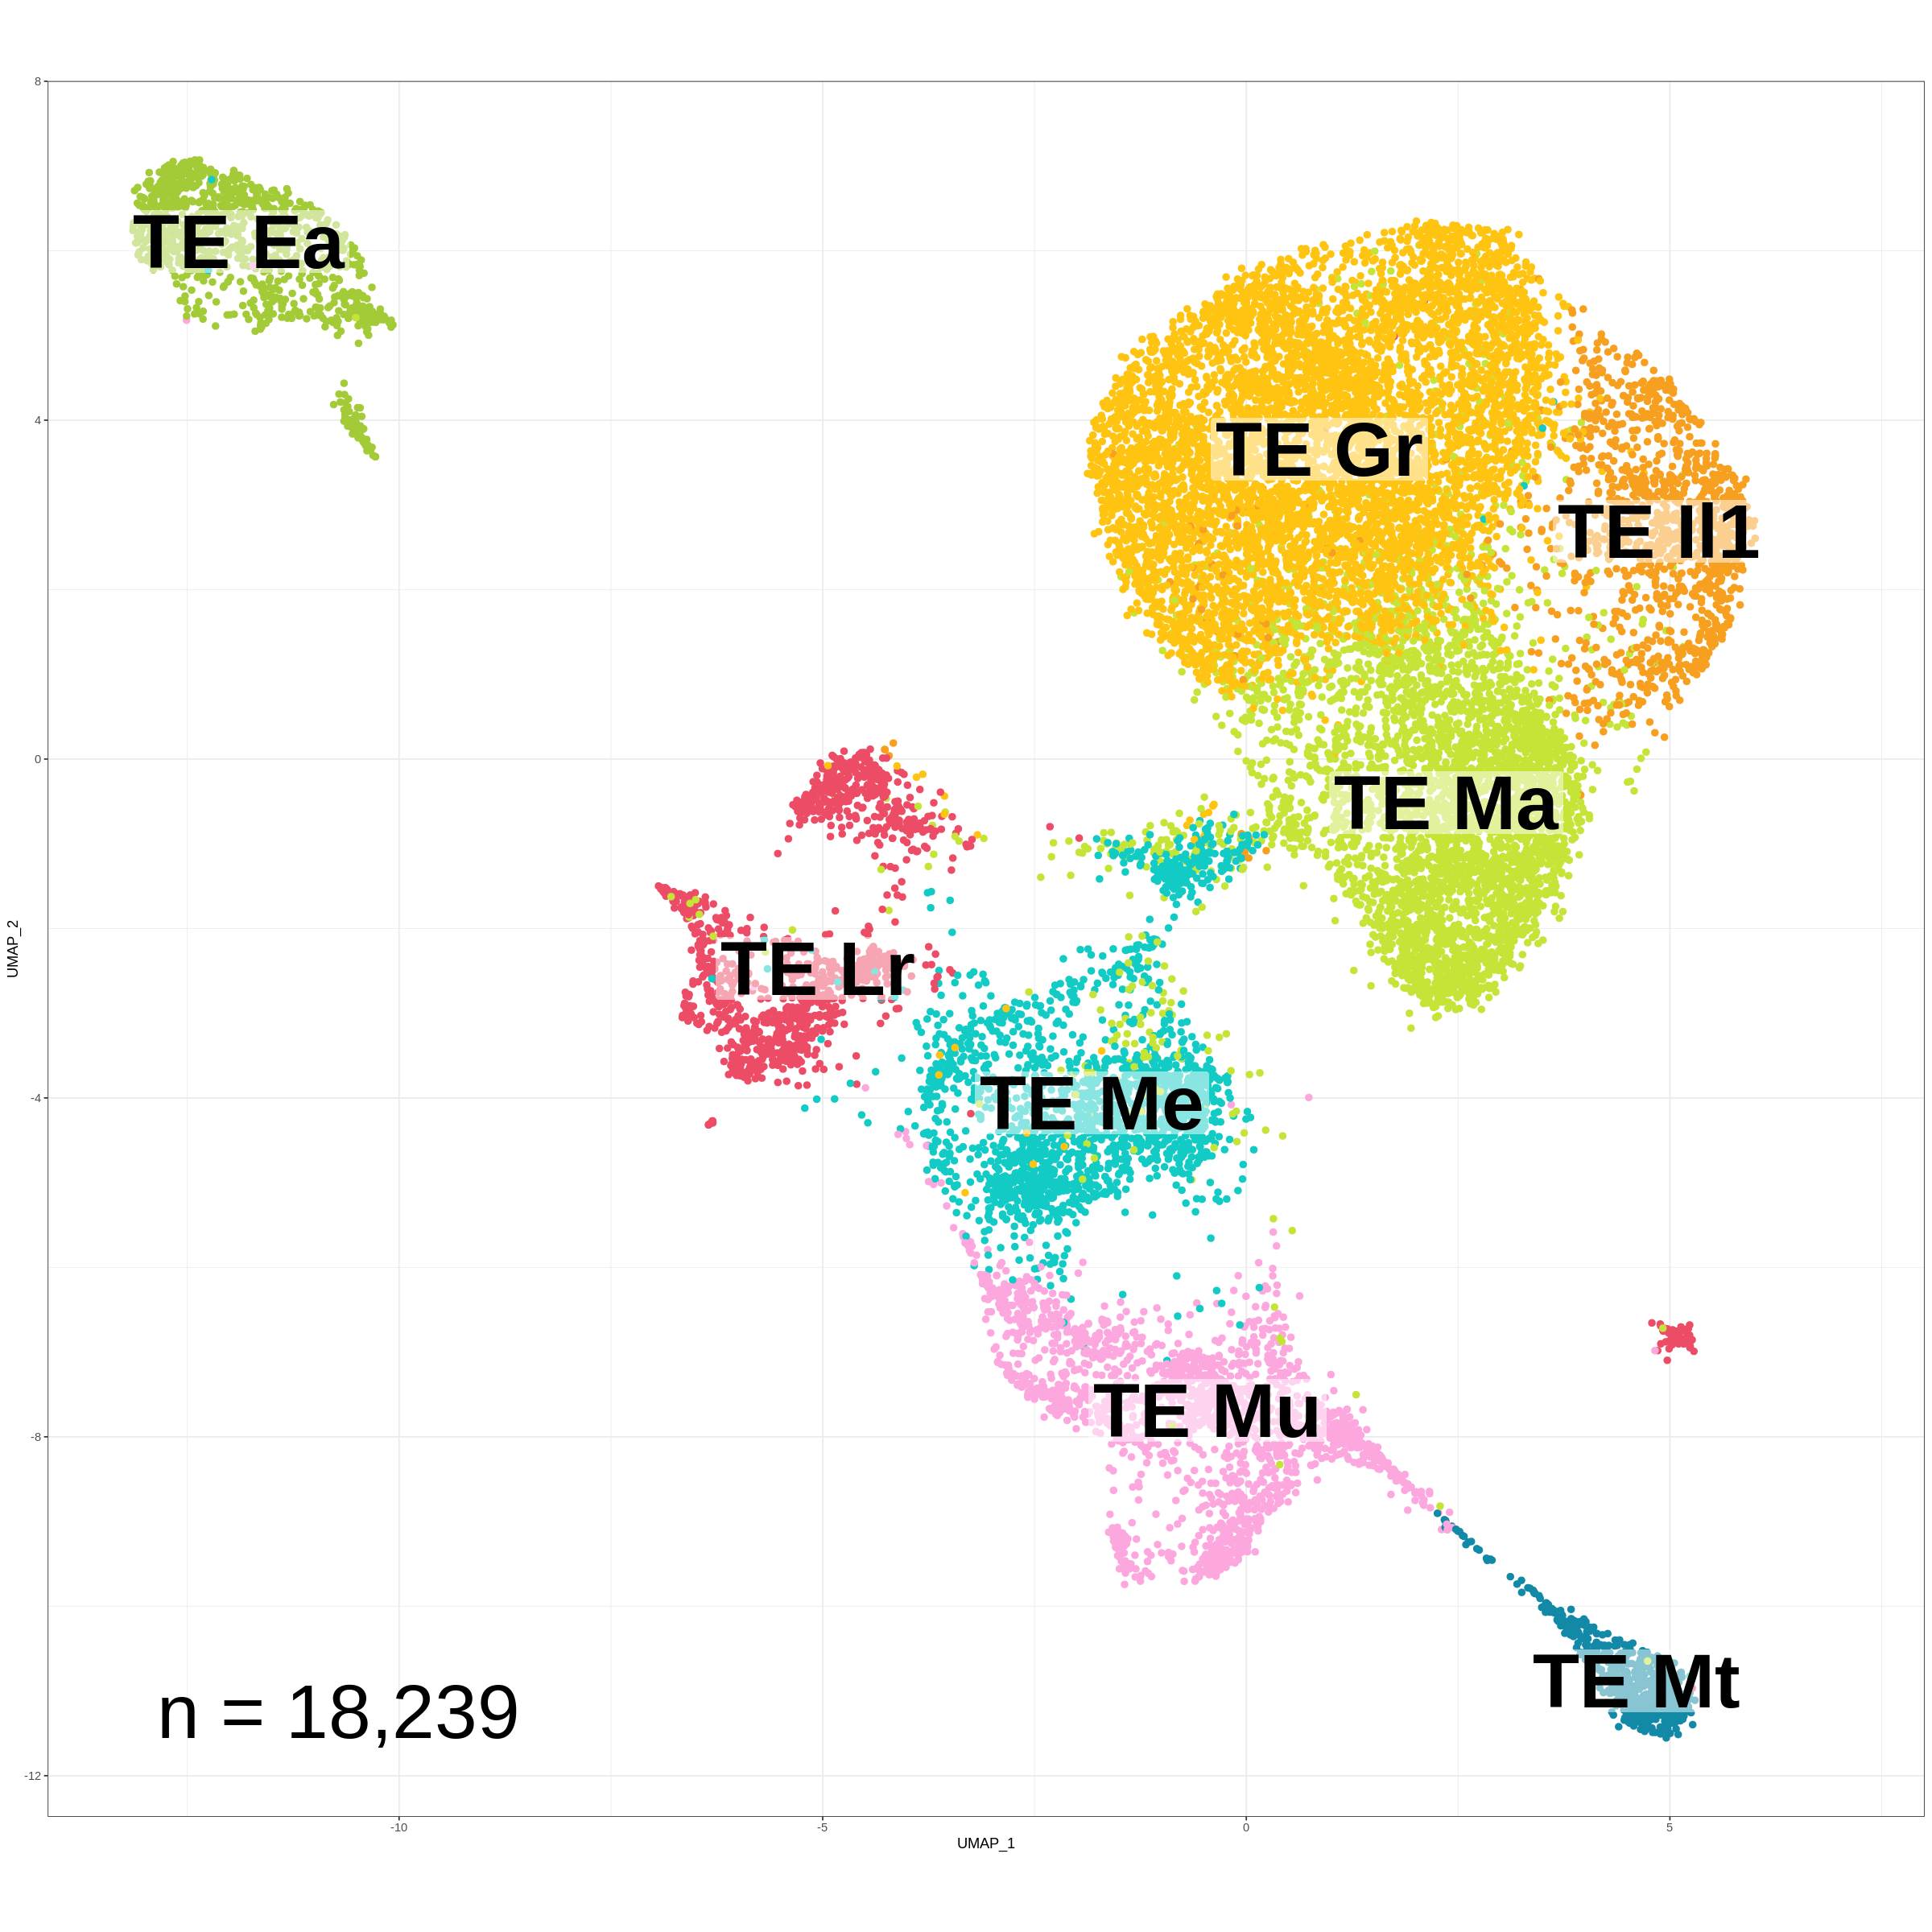

In [37]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = as.data.frame(embryo_te@reductions$umap@cell.embeddings)$UMAP_1,
    UMAP_2 = as.data.frame(embryo_te@reductions$umap@cell.embeddings)$UMAP_2,
    seurat_clusters = embryo_te@meta.data$seurat_clusters
  ) %>%
  group_by(seurat_clusters) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

p <- bind_cols(embryo_te@meta.data, as.data.frame(embryo_te@reductions$umap@cell.embeddings)) %>%
  ggplot(aes(UMAP_1, UMAP_2, color = seurat_clusters)) +
  geom_point(size = 2) +
  geom_label(
    data = UMAP_centers_cell_type,
    mapping = aes(x, y, label = seurat_clusters),
    size = 20,
    fill = 'white',
    color = 'black',
    fontface = 'bold',
    alpha = 0.5,
    label.size = 0,
    show.legend = FALSE
  ) +
  theme_bw() +
  expand_limits(x = c(-10,7), y = c(-10,7)) +
  scale_color_manual(values = custom_colors$discrete) +
  labs(color = 'Cell type') +
  guides(colour = guide_legend(override.aes = list(size = 6))) +
  theme(legend.position = 'none',legend.title = element_text(size = 40),legend.text = element_text(size = 40), legend.key.height=unit(3,"line")) +
  coord_fixed() +
  annotate(
    geom = 'text', x = -7.5, y = -Inf,
    label = paste0('n = ', format(nrow(embryo_te@meta.data), big.mark = ',', trim = TRUE)),
    vjust = -1.5, hjust = 1.25, color = 'black', size = 20
  )

p

In [38]:
ggsave('/home/adufour/work/notebook/plots/trophectoderm_cluster.svg', p, height = 28, width = 30)

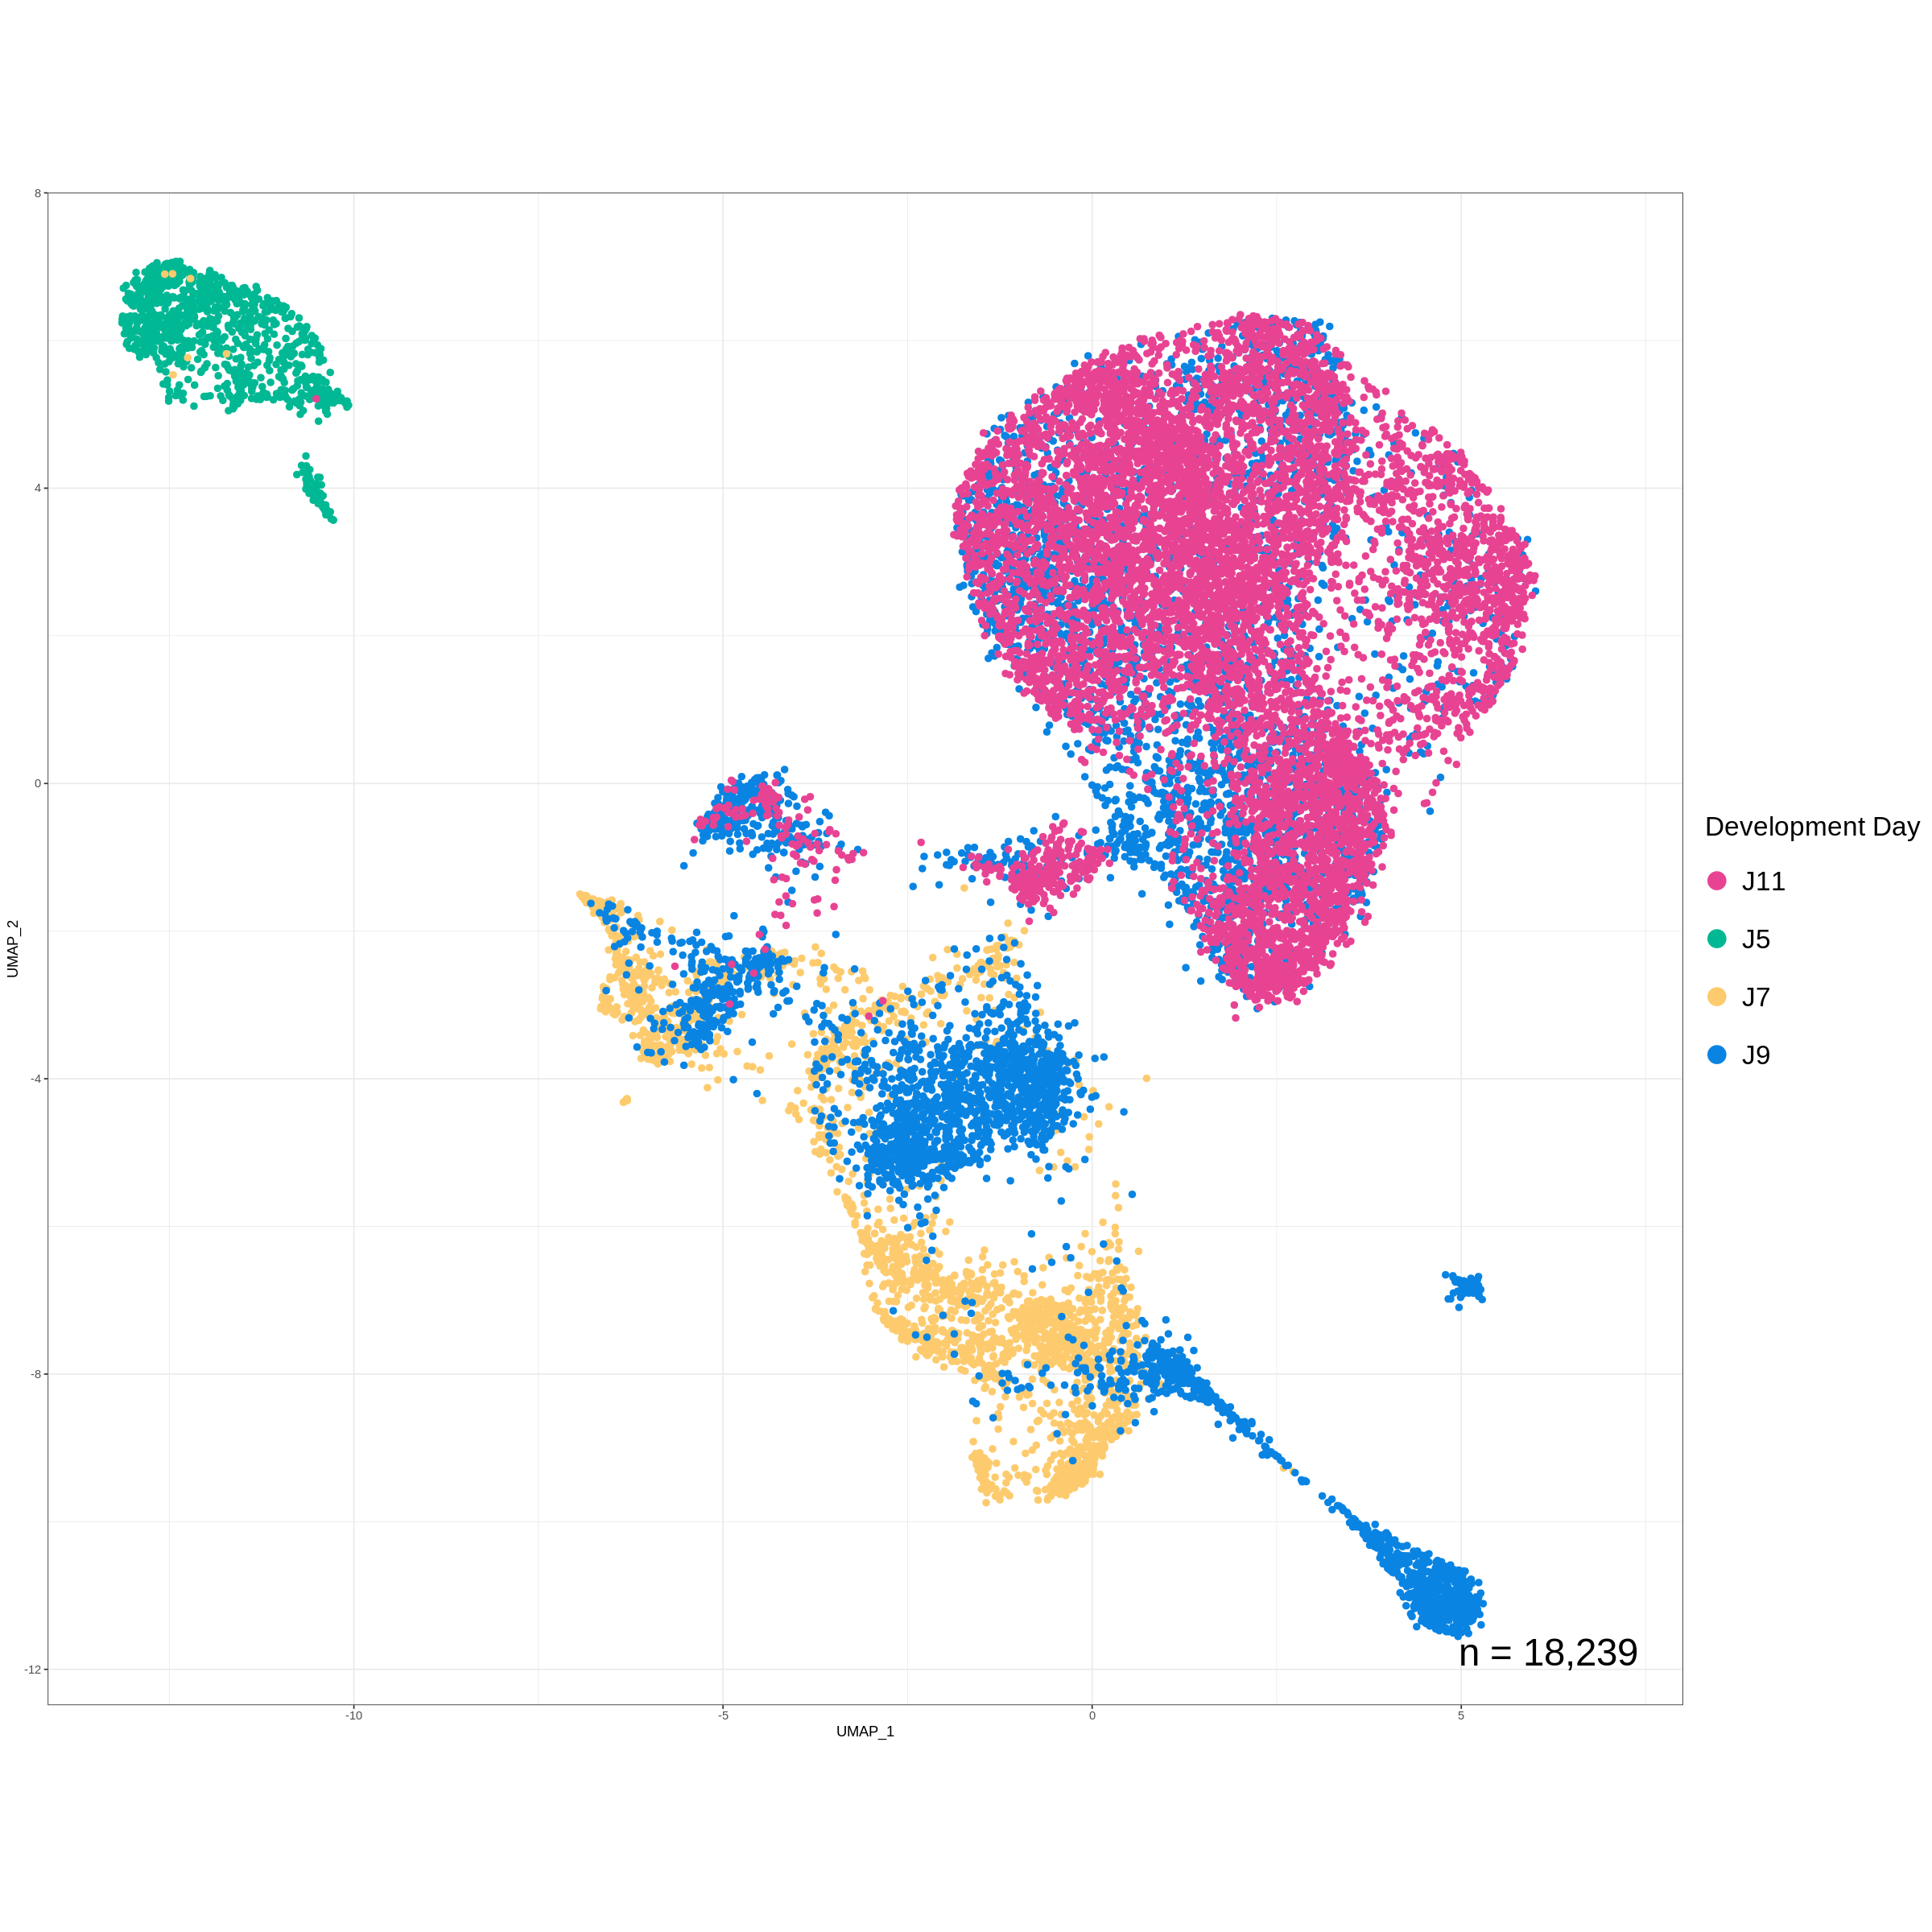

In [41]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = as.data.frame(embryo_te@reductions$umap@cell.embeddings)$UMAP_1,
    UMAP_2 = as.data.frame(embryo_te@reductions$umap@cell.embeddings)$UMAP_2,
    TIME = embryo_te@meta.data$TIME
  ) %>%
  group_by(TIME) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2)) %>%
  arrange(factor(TIME, levels = levels(c('J5','J7','J9','J11'))))

p <- bind_cols(embryo_te@meta.data, as.data.frame(embryo_te@reductions$umap@cell.embeddings)) %>%
  ggplot(aes(UMAP_1, UMAP_2, color = TIME)) +
  geom_point(size = 2) +
  theme_bw() +
  expand_limits(x = c(-10,7), y = c(-10,7)) +
  scale_color_manual(values = c("#e84393", "#00b894", "#fdcb6e", "#0984e3")) +
  labs(color = 'Development Day') +
  guides(colour = guide_legend(override.aes = list(size = 6))) +
  theme(legend.position = 'right',legend.title = element_text(size = 20),legend.text = element_text(size = 20), legend.key.height=unit(3,"line")) +
  coord_fixed() +
  annotate(
    geom = 'text', x = Inf, y = -Inf,
    label = paste0('n = ', format(nrow(embryo_te@meta.data), big.mark = ',', trim = TRUE)),
    vjust = -1.5, hjust = 1.25, color = 'black', size = 10
  )

p

In [50]:
ggsave('/home/adufour/work/notebook/plots/trophectoderm_time.svg', p, height = 28, width = 30)

In [40]:
embryo_te@meta.data$cell_type <- as.character(embryo_te@meta.data$seurat_clusters)

In [41]:
saveRDS(embryo.integrated, '/home/adufour/work/rds_storage/tissue/te_processed.rds')

In [67]:
SaveH5Seurat(embryo_te, filename = "/home/adufour/work/rds_storage/tissue/te_processed.h5Seurat")
Convert("/home/adufour/work/rds_storage/tissue/te_processed.h5Seurat", dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding scale.data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for harmony

Adding loadings for harmony

Adding projected loadings for harmony

No standard deviations for harmony

No JackStraw data for harmony

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Validating h5Seurat file

Adding scale.data from RNA as X

Transfering meta.features to var

Adding data from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for harmony

Adding feature loadings for harmony

Adding dimensional reduction information for pca

Adding f

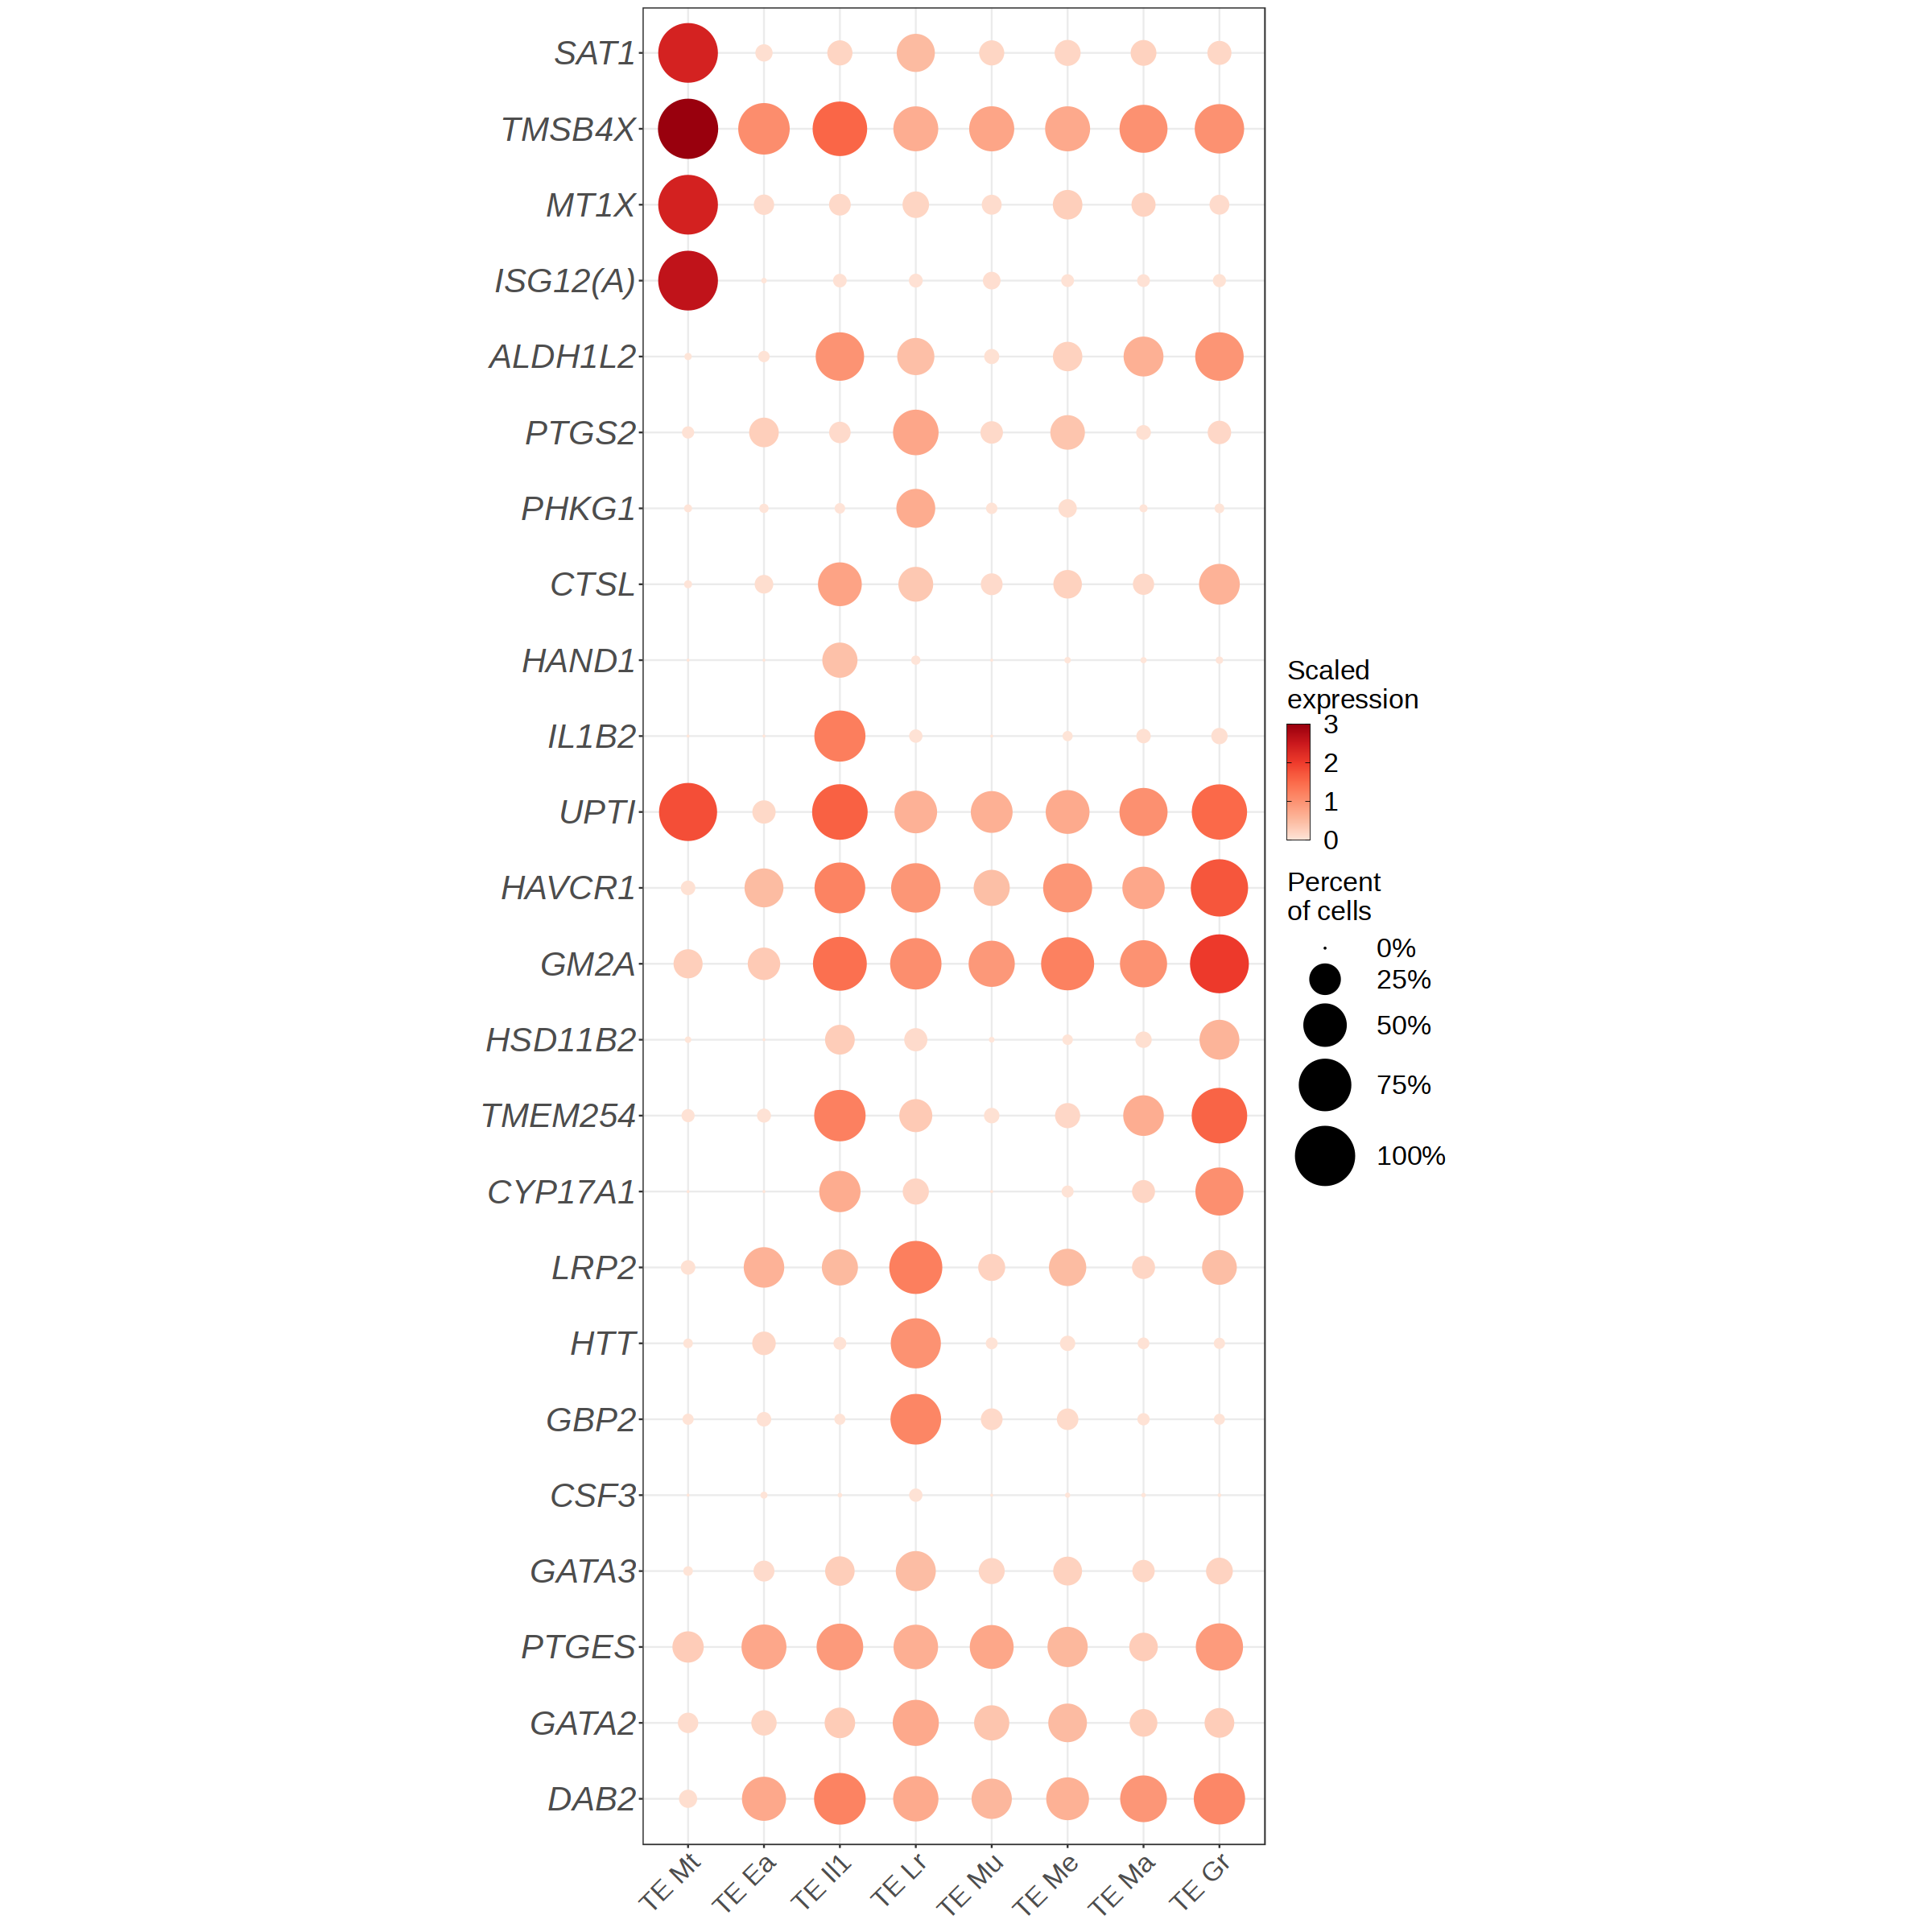

In [23]:
cluster_ids <- levels(embryo_te@meta.data$seurat_clusters)

# select a set of genes for which we want to show expression
genes_to_show <- c("CYP17A1", "TMEM254", "HSD11B2", "IL1B2", "GM2A", "DAB2", "GATA2", "PTGES", "GATA3", "CSF3", "LRP2", "ENSSSCG00000035724", "PHKG1", "GBP2", "HTT",  
                   "HAND1", "CTSL", "PTGS2", "ISG12(A)", "MT1X", "SAT1", "TMSB4X", "ALDH1L2", "ENSSSCG00000017061")

# for every cluster-gene combination, calculate the average expression across
# all cells and then transform the data into a data frame
expression_levels_per_cluster <- sapply(
    cluster_ids, function(x) {
      cells_in_current_cluster <- which(embryo_te@meta.data$seurat_clusters == x)
      Matrix::rowMeans(embryo_te@assays$RNA@data[genes_to_show,cells_in_current_cluster])
    }
  ) %>%
  t() %>%
  rescale(to=c(0,3)) %>%
  as.data.frame() %>%
  mutate(cluster = rownames(.)) %>%
  dplyr::select(cluster, everything()) %>%
  pivot_longer(
    cols = c(2:ncol(.)),
    names_to = 'gene'
  ) %>%
  dplyr::rename(expression = value) %>%
  mutate(id_to_merge = paste0(cluster, '_', gene))

# for every cluster-gene combination, calculate the percentage of cells in the
# respective group that has at least 1 transcript (this means we consider it
# as expressing the gene) and then transform the data into a data frame
percentage_of_cells_expressing_gene <- sapply(
    cluster_ids, function(x) {
      cells_in_current_cluster <- which(embryo_te@meta.data$seurat_clusters == x)
      Matrix::rowSums(embryo_te@assays$RNA@data[genes_to_show,cells_in_current_cluster] != 0)
    }
  ) %>%
  t() %>%
  as.data.frame() %>%
  mutate(cluster = rownames(.)) %>%
  dplyr::select(cluster, everything()) %>%
  pivot_longer(
    cols = c(2:ncol(.)),
    names_to = 'gene'
  ) %>%
  dplyr::rename(cell_count = value) %>%
  left_join(
    .,
    embryo_te@meta.data %>%
      group_by(seurat_clusters) %>%
      tally() %>%
      dplyr::rename(cluster = seurat_clusters),
    by = 'cluster') %>%
  mutate(
    id_to_merge = paste0(cluster, '_', gene),
    percent_cells = cell_count / n
  )

# merge the two data frames created before and plot the data

genes_to_show <- c("DAB2", "GATA2", "PTGES", "GATA3", 
                   "CSF3", "GBP2", "HTT", "LRP2", 
                   "CYP17A1", "TMEM254", "HSD11B2", "GM2A", "HAVCR1", "UPTI",
                   "IL1B2", "HAND1", "CTSL", "PHKG1",   
                   "PTGS2", "ALDH1L2",
                   "ISG12(A)", "MT1X", "TMSB4X", "SAT1")

p <- left_join(
    expression_levels_per_cluster,
    percentage_of_cells_expressing_gene %>%
    dplyr::select(id_to_merge, percent_cells),
    by = 'id_to_merge'
  ) %>%
  mutate(cluster = factor(cluster, levels = rev(cluster_ids))) %>%
  mutate(gene = factor(gene, levels = genes_to_show)) %>%
  ggplot(aes(cluster, gene)) +
  geom_point(aes(color = expression, size = percent_cells)) +
  scale_color_distiller(
    palette = 'Reds',
    direction = 1,
    name = 'Scaled\nexpression',
    limits = c(0, 3),
    guide = guide_colorbar(frame.colour = "black", ticks.colour = "black")
  ) +
  scale_size(name = 'Percent\nof cells', range = c(0,20), labels = scales::percent, limits = c(0, 1)) +
  labs(y = 'Cluster', color = 'Expression') +
  coord_fixed() +
  theme_bw() +
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20),
    axis.title.y = element_blank(),
    axis.text.y = element_text(size = 25, face = "italic")
  )

p

In [24]:
ggsave('/home/adufour/work/notebook/plots/trophectoderm_marker.svg', p, height = 20, width = 9)